In [24]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime


pytrends = TrendReq(hl='en-US', tz=360)  # hl is the host language for the API, tz is the time zone offset


Gtrend Scrapping

In [26]:
keywords = ['inflation']
today = datetime.now().strftime('%Y-%m-%d')
timeframe = f'2004-01-01 {today}'
pytrends.build_payload(kw_list=keywords, timeframe=timeframe)
data = pytrends.interest_over_time()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Inflation Scrapping

In [27]:
start = datetime(2004, 1, 1)
end = datetime.now()
cpi_data = web.DataReader('CPIAUCSL', 'fred', start, end)

inflation_rate = cpi_data.pct_change() * 100

inflation_rate = inflation_rate.dropna()

inflation_rate.columns = ['Annual Inflation Rate (%)']

print(inflation_rate)


            Annual Inflation Rate (%)
DATE                                 
2004-02-01                   0.214707
2004-03-01                   0.214247
2004-04-01                   0.160342
2004-05-01                   0.426894
2004-06-01                   0.371945
...                               ...
2023-11-01                   0.160309
2023-12-01                   0.233099
2024-01-01                   0.305433
2024-02-01                   0.442062
2024-03-01                   0.378069

[242 rows x 1 columns]


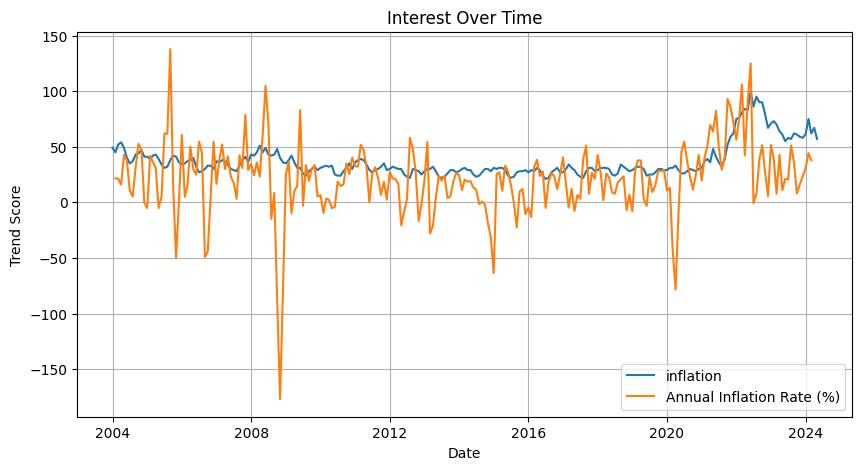

In [28]:

plt.figure(figsize=(10, 5))
plt.plot(data.index, data['inflation'], label='inflation')
plt.plot(inflation_rate.index, inflation_rate['Annual Inflation Rate (%)']*100, label='Annual Inflation Rate (%)')

plt.title('Interest Over Time')
plt.xlabel('Date')
plt.ylabel('Trend Score')
plt.legend()
plt.grid(True)
plt.show()